## Sample Prediction Demo

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.models import Unet
from src.config import ModelConfig
from src.dataloader import prepare_datasets

2024-10-05 16:15:22.294850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 16:15:22.314932: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 16:15:22.321032: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-05 16:15:22.338012: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 16:15:23.376799: W tensorflow/compiler/tf2

Segmentation Models: using `keras` framework.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import segmentation_models as sm

# set up environment
config = ModelConfig()
sm.set_framework('tf.keras')

# prepare data
preprocess_input = sm.get_preprocessing(config.backbone) if config.backbone else None
df = pd.read_csv(config.split_path)
train_ds, val_ds, test_ds = prepare_datasets(
    df,
    batch_size=1,
    input_shape=config.img_shape,
    preprocess_func=preprocess_input, 
    augment_flag=False, 
)

# define model
if config.backbone:
    unet_model = sm.Unet(
        config.backbone, 
        encoder_weights=config.encoder_weights, 
        input_shape=config.img_shape, 
        classes=1,
        activation='sigmoid'
    )
else:
    unet_model = Unet(
        input_shape=config.img_shape, 
        classes=1, 
        activation='sigmoid'
    ).build()

# compile model
unet_model.compile()
unet_model.load_weights(config.save_model_path)

2024-10-05 16:15:26.762000: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79198 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:4e:00.0, compute capability: 8.0


Training set size: 273
Validation set size: 10
Test set size: 10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 150 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


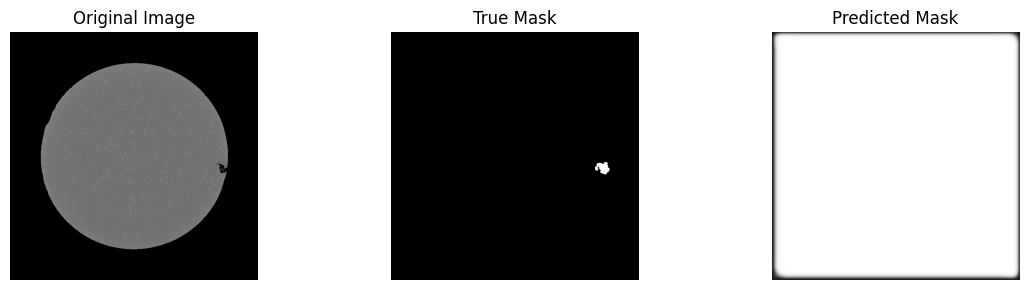

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


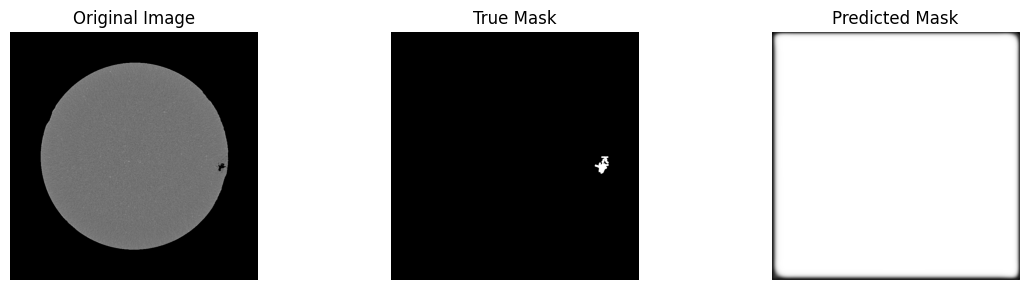

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


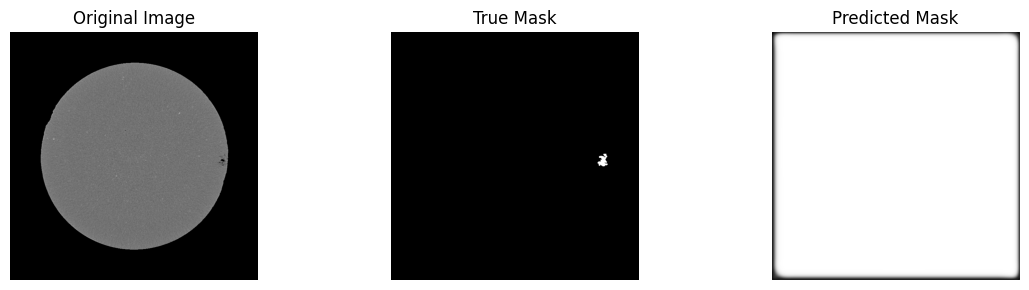

In [11]:
num_samples = 3
samples = val_ds.take(num_samples)

for image, mask in samples:
    prediction = unet_model.predict(image)
    
    # squeeze dimensions
    image = tf.squeeze(image)
    mask = tf.squeeze(mask)
    prediction = tf.squeeze(prediction)
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    
    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title('True Mask')
    axs[1].axis('off')
    
    axs[2].imshow(prediction, cmap='gray')
    axs[2].set_title('Predicted Mask')
    axs[2].axis('off')
    
    plt.tight_layout()
    plt.show()

I0000 00:00:1728159329.989236  543540 service.cc:146] XLA service 0x7fcba801c3d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728159329.989283  543540 service.cc:154]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-10-05 16:15:30.023082: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-05 16:15:30.186718: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1728159332.454795  543540 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


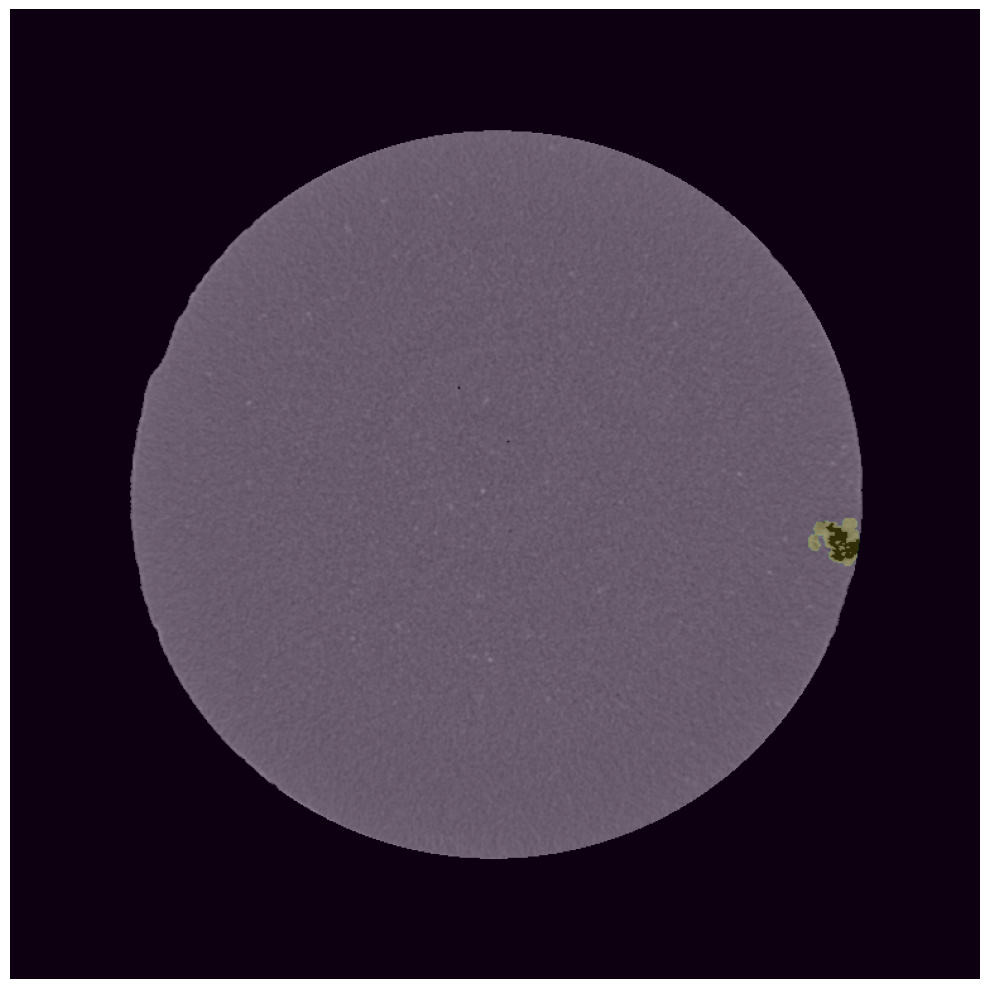

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


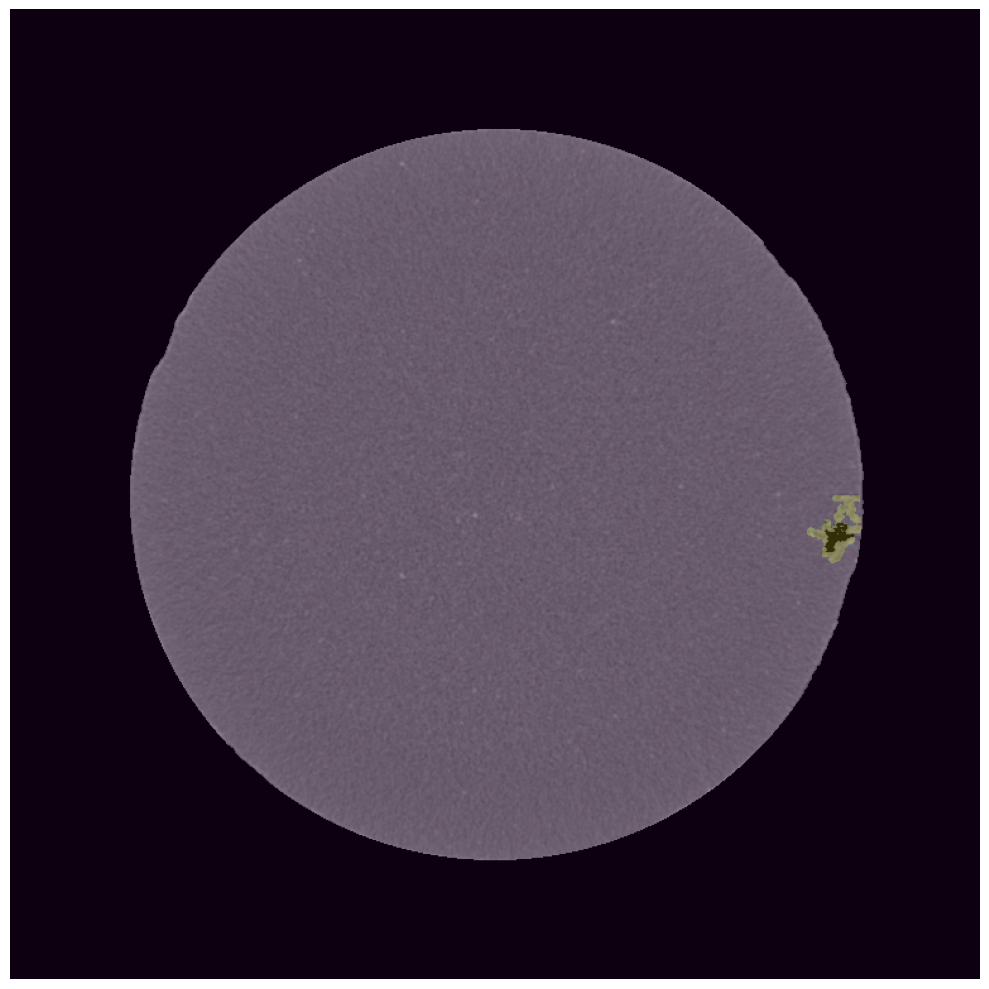

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


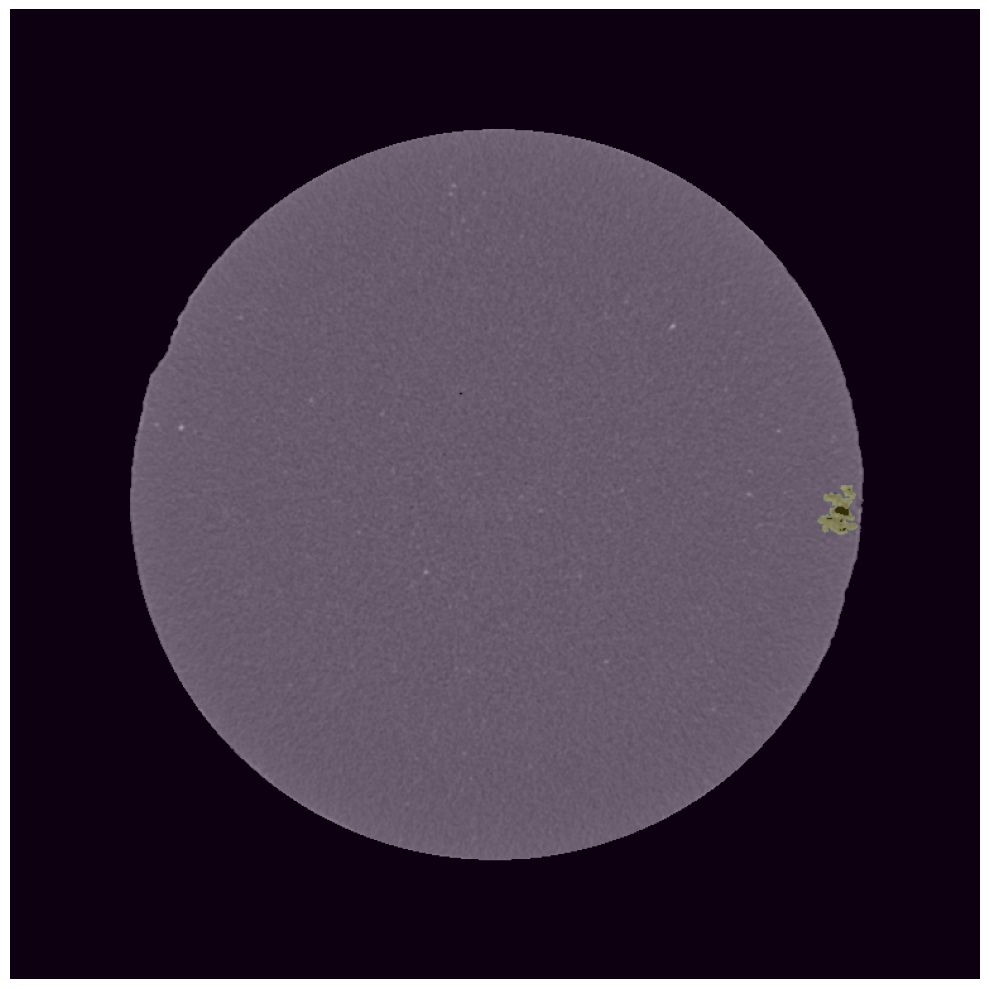

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


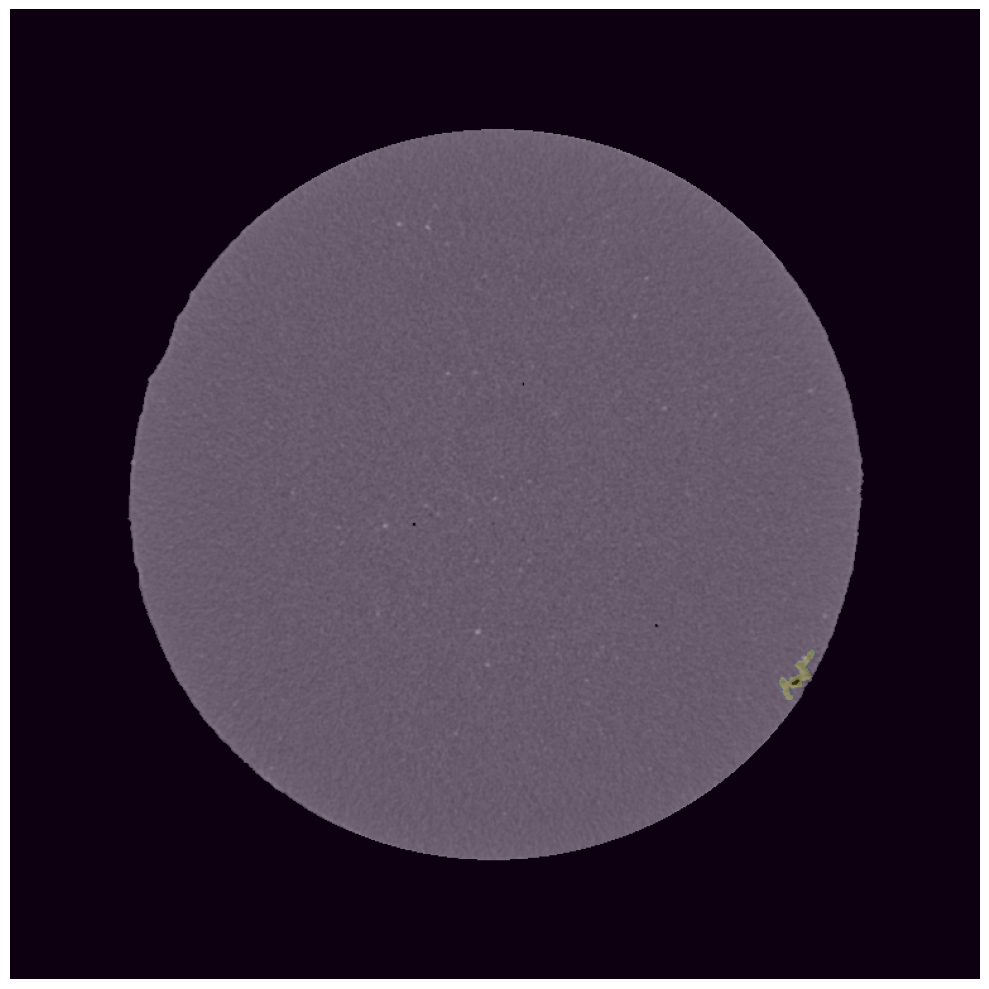

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


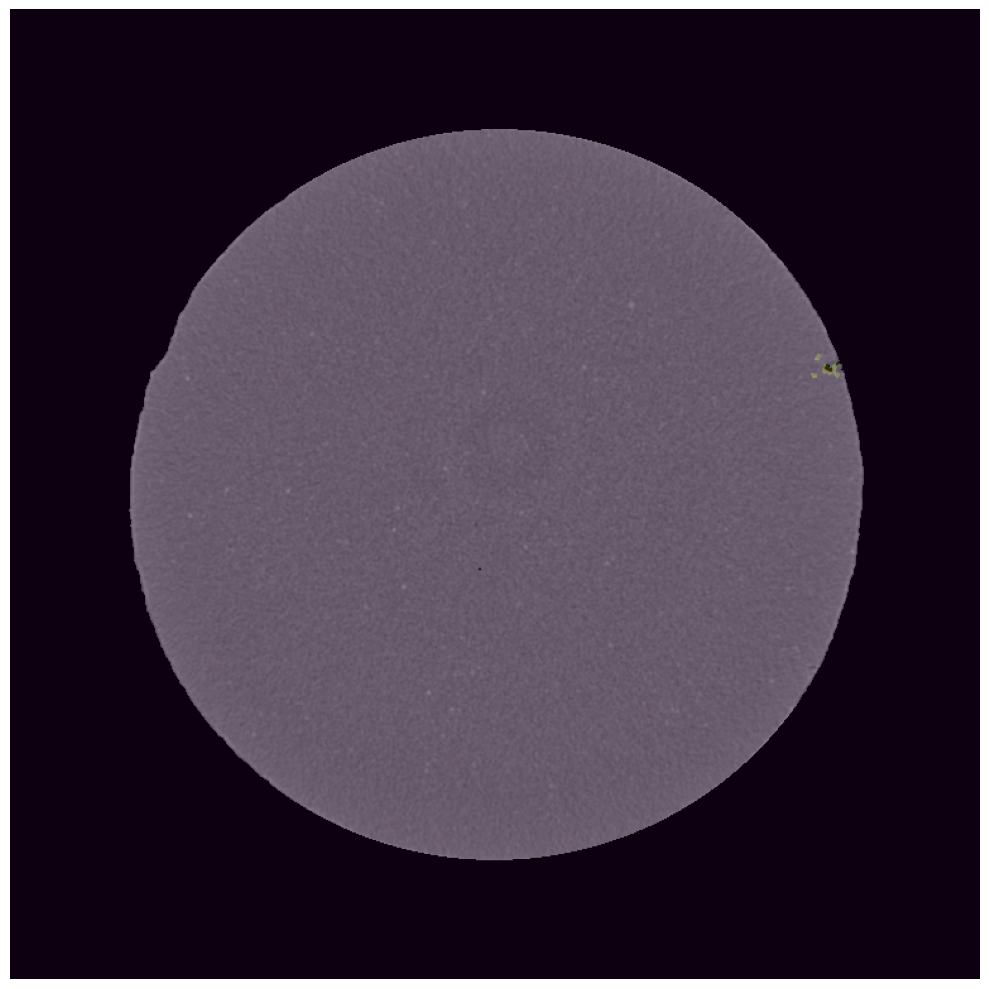

2024-10-05 16:15:35.357692: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


: 

In [3]:
num_samples = 5
samples = val_ds.take(num_samples)

for image, mask in samples:
    prediction = unet_model.predict(image)
    
    # squeeze dimensions
    image = tf.squeeze(image)
    mask = tf.squeeze(mask)
    prediction = tf.squeeze(prediction)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image, cmap='gray')
    ax.imshow(mask, alpha=0.2)
    ax.axis('off')    
    plt.tight_layout()
    plt.show()